In [1]:
import time

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy

from mpl_toolkits.mplot3d import Axes3D
from scipy.special import airy
from matplotlib import cm
from qutip import *
from funcs import *

%matplotlib inline

In [62]:
n1 , n2 , n3, wln1[0], wln2[0], wln3[0]

(5.995736616523086,
 8.538515206910406,
 6.984246191253013,
 1.6664410815872512,
 1.8650491057753815,
 1.7522356263040983)

In [69]:
(n2 - n1) / n1

0.4240977803094145

In [70]:
(wln2[0] - wln1[0]) / wln1[0]

0.11918094577874916

In [58]:
n1 = innercubic(0.286364, 0.104082, 150)[1]
n2 = innercubic(0.286364, 0.104082, 300)[1]
n3 = innercubic(0.286364, 0.104082, 200)[1]

In [55]:
wln3 = wln(innercubic(0.286364,0.104082,200)[0], 1e-3)
print(wln3)

(1.7522356263040983, 0.9931492004089966, 59.016600370407104, 46.958740234375, [-15.0, 15.0], [-16.5, 17.5])


In [52]:
wln1 = wln(innercubic(0.286364,0.104082,150)[0], 1e-3)
wln2 = wln(innercubic(0.286364,0.104082,300)[0], 1e-3)

In [53]:
print(wln1,wln2)12 42

(1.6664410815872512, 0.9938334892170125, 28.216132640838623, 25.70849895477295, [-13.5, 13.5], [-14.5, 14.5]) (1.8650491057753815, 0.9892607524681415, 145.15763306617737, 102.44842576980591, [-16.0, 16.0], [-19.0, 18.5])


In [2]:
N = 50

# States
vac = basis(N, 0)

fockone = basis(N, 1)
focktwo = basis(N, 2)

coher = coherent(N, 1)

sqzvac = squeeze(N, 0.5) * vac

In [4]:
print(plt.style.available)
plt.style.use(('classic', 'seaborn', 'seaborn-white', 'seaborn-talk'))
#('classic', 'seaborn', 'seaborn-white', 'seaborn-talk')
mpl.rcParams['axes.labelpad']= 15
mpl.rcParams['axes.labelsize']= 20
# mpl.rcParams['ytick.major.pad']='20'
# mpl.rcParams['ztick.major.pad']='20'

['bmh', 'seaborn-poster', 'seaborn-notebook', 'seaborn-darkgrid', '_classic_test', 'seaborn-muted', 'seaborn-ticks', 'seaborn-colorblind', 'grayscale', 'seaborn', 'seaborn-pastel', 'ggplot', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-paper', 'tableau-colorblind10', 'seaborn-white', 'fivethirtyeight', 'seaborn-whitegrid', 'fast', 'classic', 'seaborn-talk', 'dark_background', 'Solarize_Light2', 'seaborn-deep', 'seaborn-dark']


In [5]:
# with plt.style.context(('classic', 'seaborn', 'seaborn-white', 'seaborn-talk')):
#     fig1, ax1 = myplotwigner(fockone, [-4, 4], [-4, 4], title='First Fock State')
# ax1.view_init(elev=20, azim=-65)

# # ax1.set_xlabel('label text', labelpad=-30)
# # ax1.set_ylabel('label text', labelpad=-30)
# # ax1.set_zlabel('label text', labelpad=-30)

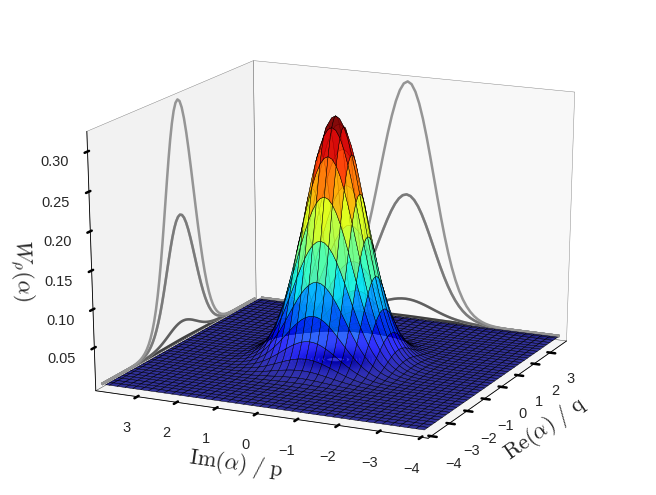

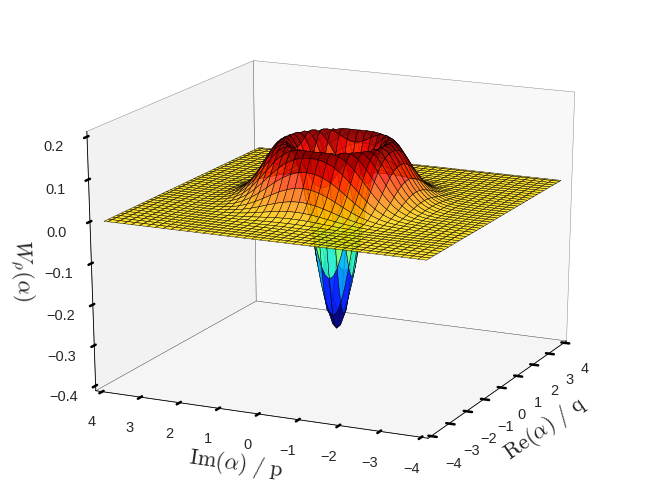

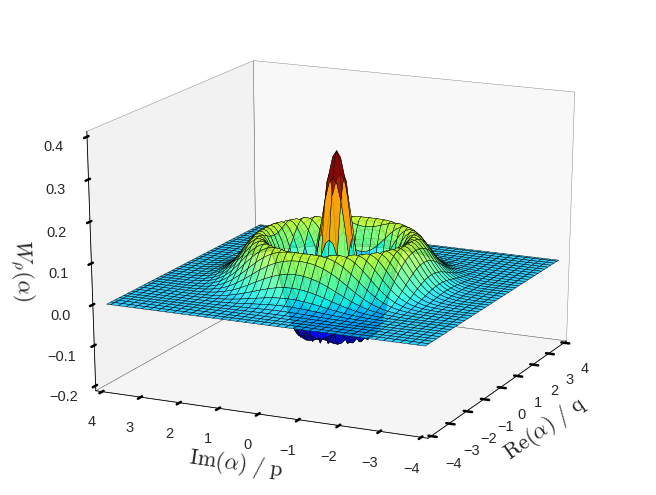

In [6]:
# , title='Vacuum State')
fig0, ax0 = myplotwigner(vac, [-4, 4], [-4, 4], cont=True)
ax0.view_init(elev=20, azim=-65 - 90)

# , title='First Fock State')
fig1, ax1 = myplotwigner(fockone, [-4, 4], [-4, 4])
ax1.view_init(elev=20, azim=-65 - 90)

# , title='Second Fock State', fineness=80)
fig2, ax2 = myplotwigner(focktwo, [-4, 4], [-4, 4])
ax2.view_init(elev=20, azim=-65 - 90)

fig0.savefig('fig/vac.pdf', format='pdf')
fig1.savefig('fig/fockone.pdf', format='pdf')
fig2.savefig('fig/focktwo.pdf', format='pdf')

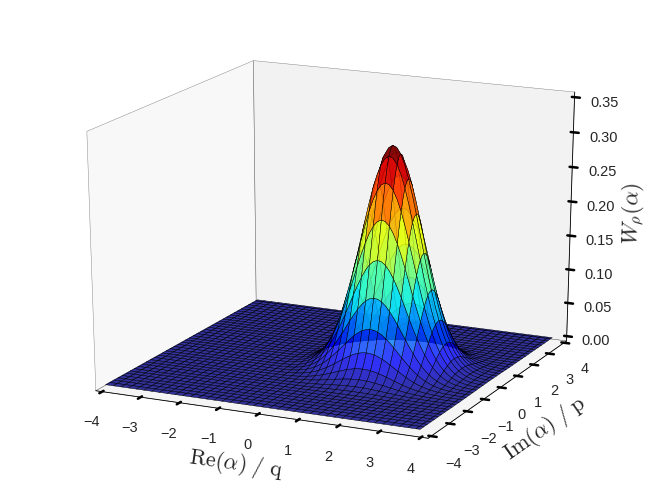

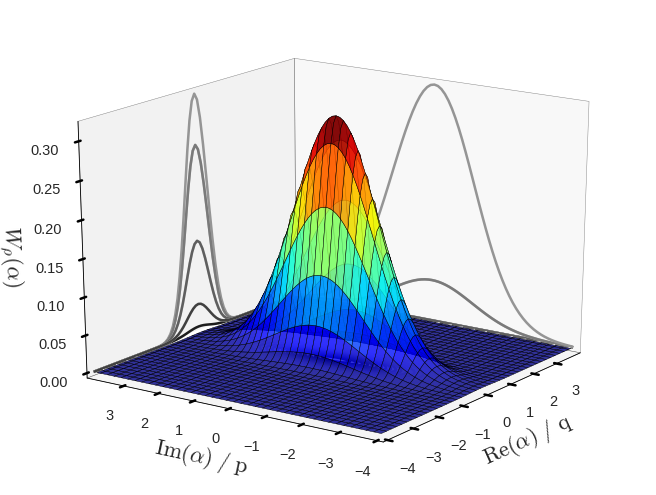

In [7]:
# , title='Coherent State')
figcoh, axcoh = myplotwigner(coher, [-4, 4], [-4, 4])
axcoh.view_init(elev=20, azim=-65)

# , title='Squeezed Vacuum State')
figsqz, axsqz = myplotwigner(sqzvac, [-4, 4], [-4, 4], cont=True)
axsqz.view_init(elev=20, azim=-55 - 90)

figcoh.savefig('fig/coher.pdf', format='pdf')
figsqz.savefig('fig/sqzvac.pdf', format='pdf')

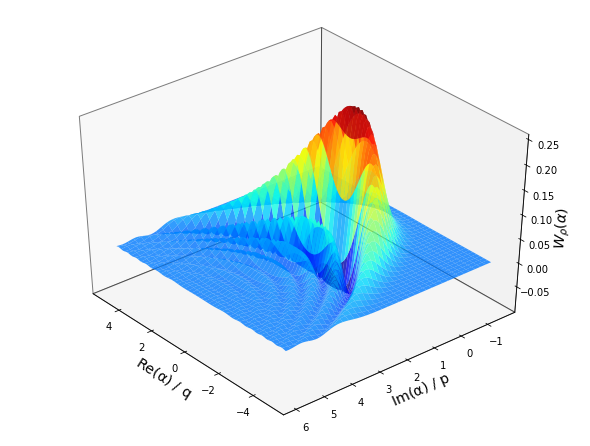

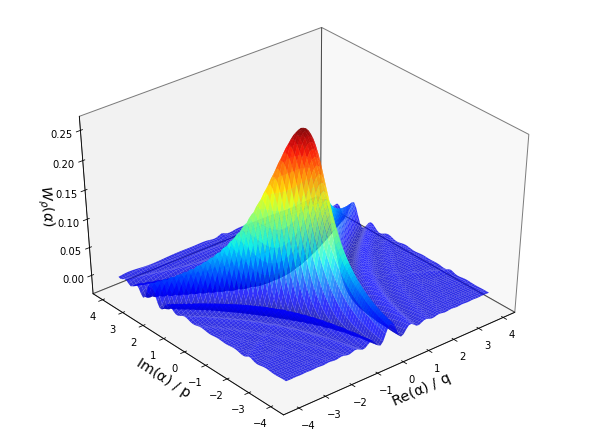

In [44]:
mpl.rcParams['axes.labelsize']= 14.3

# CPS and TPS versions here
gamma1 = 0.05
r1 = 1
N2 = 200

figcub, axcub = myplotwigner(cubic(gamma1, r1, N2)[0], [-5, 5], [-1.5, 6])
axcub.view_init(elev=40, azim=230 - 90)
axcub.dist = 10.5

gamma2 = 0.15
r2 = 0.05

figtri, axtri = myplotwigner(innercubic(gamma2, r2, N2)[
                             0], [-4, 4], [-4, 4], rccount=90)
axtri.view_init(elev=40, azim=230)
axtri.dist = 10.5

figcub.savefig('fig/cubic.pdf', format='pdf')
figtri.savefig('fig/triple.pdf', format='pdf')

## Analytic / Numeric comparison for CPS

In [20]:
# Highest nmean in final plot at r = 1.302542 gamma = 0.071186
# Highest nmean in whole data set at gamma = 0.873418 r = 0.230769

In [63]:
gamma = 0.071
r = 1.30
q, p = np.linspace(-9, 9, 200), np.linspace(-4.5, 20, 200)
# gamma = 0.873
# r = 0.230
# q, p = np.linspace(-3, 3, 200), np.linspace(-4.5, 20, 200)
N = 300
cubestate, n = cubic(gamma, r, N)
print(n)

5.957966216471156


In [64]:
# wlnnum = wln(cubestate, 1e-4, 400, 400, [-9, 9], [-15, 15])
# # wlnana = wlnanalytic(gamma, r, 1e-4, 400, 400)
# print(wlnnum)#, wlnana, sep='\n')

In [65]:
analy = wigcubic(q, p, gamma, r)
numer = wigner(cubestate, q, p)

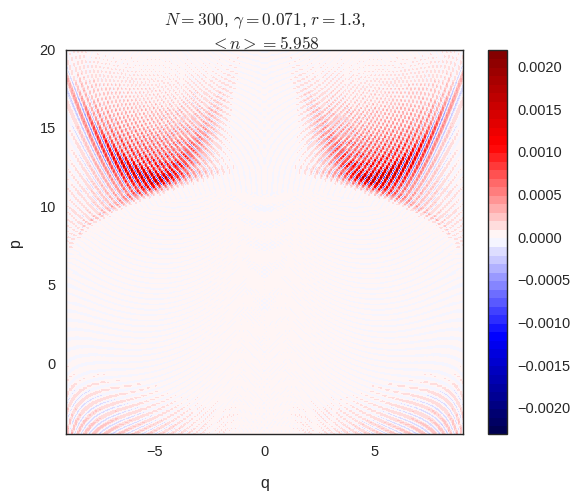

In [69]:
norm = MidpointNorm(0)

diffig, difax = mycontourplot(q, p, numer - analy, fr'''$N = {N}$, $\gamma = {gamma}$, $r = {r}$,
$<n> = {n:.04}$''', ['q', 'p'], cmap='seismic', norm=norm)

figcont.savefig('fig/ana-num_comparison_1-HighN.pdf', bbox_inches = "tight")
# figcont.savefig('fig/ana-num_comparison_2-HighN.pdf', bbox_inches = "tight")
# figcont.savefig('fig/ana-num_comparison_1.pdf', bbox_inches = "tight")
# figcont.savefig('fig/ana-num_comparison_2.pdf', bbox_inches = "tight")

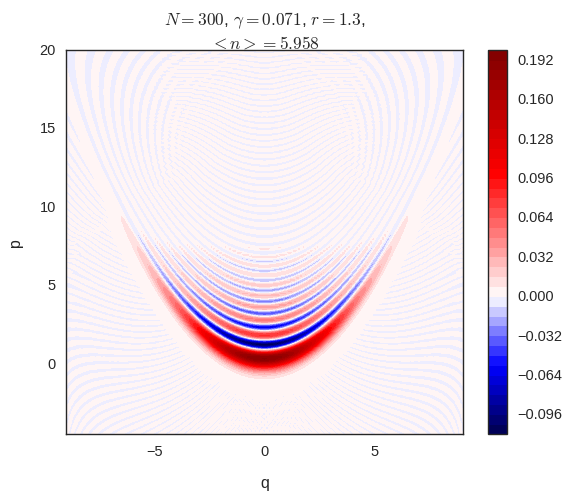

In [67]:
norm = MidpointNorm(np.abs(numer).min())

numfig, numax = mycontourplot(q, p, numer.real, fr'''$N = {N}$, $\gamma = {gamma}$, $r = {r}$,
$<n> = {n:.04}$''', ['q', 'p'], cmap='seismic', norm=norm)

numfig.savefig('fig/num_cubic_contour_1-HighN.pdf', format='pdf', bbox_inches = "tight")
# numfig.savefig('fig/num_cubic_contour_2-HighN.pdf', format='pdf', bbox_inches = "tight")
# numfig.savefig('fig/num_cubic_contour_1.pdf', format='pdf', bbox_inches = "tight")
# numfig.savefig('fig/num_cubic_contour_2.pdf', format='pdf', bbox_inches = "tight")

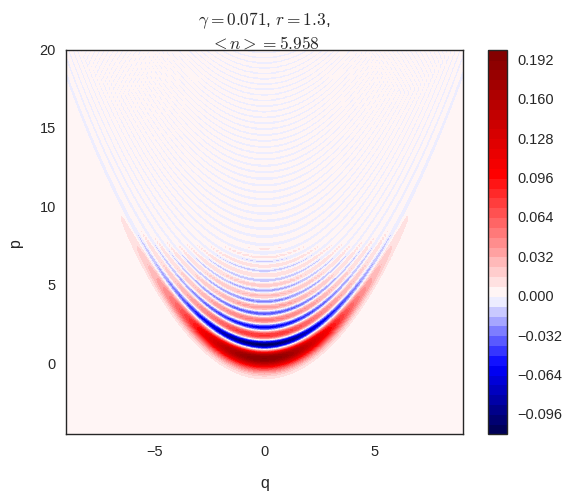

In [68]:
norm = MidpointNorm(np.abs(analy).min())

anafig, anaax = mycontourplot(q, p, analy.real, fr'''$\gamma = {gamma}$, $r = {r}$,
$<n> = {n:.04}$''', ['q', 'p'], cmap='seismic', norm=norm)

anafig.savefig('fig/ana_cubic_contour_1-HighN.pdf', format='pdf', bbox_inches = "tight")
# anafig.savefig('fig/ana_cubic_contour_2-HighN.pdf', format='pdf', bbox_inches = "tight")
# anafig.savefig('fig/ana_cubic_contour_1.pdf', format='pdf', bbox_inches = "tight")
# anafig.savefig('fig/ana_cubic_contour_2.pdf', format='pdf', bbox_inches = "tight")